## Наивный байесовский классификатор для цифр 1 и 2 из датасета MNIST

In [1]:
import torch
import torchvision
from tqdm import tqdm
import time
import numpy as np
import pandas as pd

In [2]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [3]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [4]:
def prepare_X_Y(data):
    X=torch.tensor([])
    Y=[]
    for massive,label in tqdm(data):
        time.sleep(0.0001)
        if (label == 1) or (label == 2):
            X = torch.cat((X, massive), dim=0)
            Y.append(label)
    Y = torch.tensor(Y)
    X = X.view((-1, 784))
    return X,Y
    

In [5]:
X_train,Y_train = prepare_X_Y(mnist_train)

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [05:23<00:00, 110.77it/s]


## Вероятности конкретных цифр в изображении

In [6]:
P_digit_i = X_train.sum(axis=0) / X_train.sum()

## Вероятность вхождения цифры при условии, что изображение является "1"

## $P(digit|"1") = \frac{Количество\ вхождений\ цифры\ digit\ в\ изображения\ с\ "1"}{Количество\ digit\ в\ "1"}$

In [7]:
X_train_for_1 = X_train[(Y_train == 1)]

In [8]:
X_train_for_1.shape

torch.Size([6742, 784])

In [9]:
P_digit_1 = X_train_for_1.sum(axis=0) / X_train_for_1.sum()
P_digit_1.shape

torch.Size([784])

## Вероятность вхождения цифры при условии, что изображение является "2"

In [10]:
X_train_for_2 = X_train[(Y_train == 2)]

In [11]:
P_digit_2 = X_train_for_2.sum(axis=0) / X_train_for_2.sum()
P_digit_2.shape

torch.Size([784])

## Вероятность "1" и "2"

In [12]:
P_1 = (Y_train == 1).sum().item() / len(Y_train)
P_2 = (Y_train == 2).sum().item() / len(Y_train)

In [13]:
P_1

0.5308661417322834

In [14]:
P_2

0.46913385826771653

$P("1"|digit)=\frac{P(digit|"1")P("1")}{P(digit)}$

$P("1"|digit)=\frac{P(digit_1|"1")P(digit_2|"1")...P(digit_n|"1")P("1")}{P(digit_1)P(digit_2)...P(digit_n)}$

In [15]:
X_test,Y_test = prepare_X_Y(mnist_test)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 451.20it/s]


In [16]:
def BayesClassificator(test_sample, show = False):
    #numerator и denominator - то что находится в числителе и в знаменателе формулы Байеса
    # умножение числителя и знаменателя на 500, чтобы малые числа не округлялись в 0
    numerator_1 = (test_sample * P_digit_1* 500)[test_sample != 0 ].prod() * P_1
    denominator_1 = ((test_sample * P_digit_i*500)[test_sample != 0].prod())
    numerator_2 = (test_sample * P_digit_2* 500)[test_sample != 0 ].prod() * P_2
    denominator_2 = ((test_sample * P_digit_i*500)[test_sample != 0].prod())
    if show:
        print(f'numerator_1 {numerator_1}')
        print(f'denominator_1 {denominator_1}')
        print(f'numerator_2 {numerator_2}')
        print(f'denominator_2 {denominator_2}')    
    return np.argmax([numerator_1 / denominator_1,numerator_2 / denominator_2]) + 1
    

In [18]:
Y_pred = []
for sample in tqdm(X_test):
    time.sleep(0.001)
    Y_pred.append(BayesClassificator(sample))

100%|█████████████████████████████████████████████████████████████████████████████| 2167/2167 [00:04<00:00, 528.92it/s]


In [23]:
predicted = pd.DataFrame(list(zip(Y_test.numpy(),Y_pred)), columns = ['true','predicted'])

In [24]:
predicted.head()

,true,predicted
0,2,2
1,1,1
2,1,1
3,1,1
4,1,1


## Оценка классификатора

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
def classificator_score(y_,y_p):
    print(f' accuracy score {round(accuracy_score(y_, y_p),3)}')
    print(f' precision score {round(precision_score(y_, y_p),3)}')
    print(f' recall score {round(recall_score(y_, y_p),3)}')
    print(f' F1 score {round(f1_score(y_, y_p),3)}')
    return

In [27]:
classificator_score(Y_test,Y_pred)

 accuracy score 0.962
 precision score 0.964
 recall score 0.963
 F1 score 0.963


## 10 неправильных предсказаний

In [28]:
predicted[predicted['true'] != predicted['predicted']].head(10)

,true,predicted
12,1,2
57,2,1
59,2,1
78,2,1
128,1,2
139,2,1
141,1,2
142,2,1
169,2,1
179,2,1


## Отобразим одно из неправильно предсказанных изображений _

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
X_test[12]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [30]:
Y_test[12].item()

1

In [34]:
Y_pred[12]

2

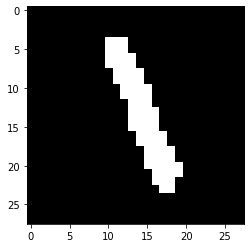

In [33]:
plt.imshow(X_test[12].reshape(28, 28), cmap='gray', vmin=0, vmax=1)